<a href="https://colab.research.google.com/github/sbhusal123/Calculator/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorboardcolab import *



In [0]:
fashoin_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashoin_mnist.load_data()

class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


[]

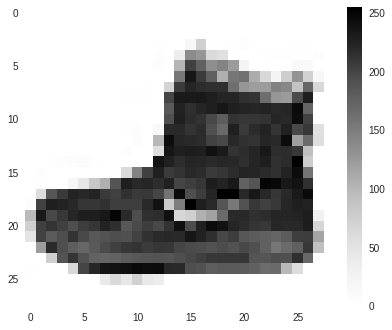

In [104]:
plt.imshow(train_images[0])
plt.colorbar() #show color range bar numeric value
plt.gca().grid(False) #dont show grid on plot
plt.plot()

In [105]:
train_images = train_images/255.0
test_images = test_images/255.0

print(train_images.shape)

(60000, 28, 28)


In [106]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])



tfc = TensorBoardColab(startup_waiting_time=8)
model.fit(train_images,train_labels,epochs=50,validation_data=(test_images,test_labels))


Wait for 8 seconds...
TensorBoard link:
https://1128a31a.ngrok.io
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 11s 179us/sample - loss: 0.7342 - acc: 0.7664 - val_loss: 0.5670 - val_acc: 0.8045
Epoch 2/50
60000/60000 [==============================] - 9s 142us/sample - loss: 0.5117 - acc: 0.8281 - val_loss: 0.5150 - val_acc: 0.8212
Epoch 3/50
60000/60000 [==============================] - 9s 146us/sample - loss: 0.4677 - acc: 0.8380 - val_loss: 0.4810 - val_acc: 0.8328
Epoch 4/50
60000/60000 [==============================] - 8s 140us/sample - loss: 0.4435 - acc: 0.8469 - val_loss: 0.4586 - val_acc: 0.8382
Epoch 5/50
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4259 - acc: 0.8529 - val_loss: 0.4601 - val_acc: 0.8369
Epoch 6/50
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4121 - acc: 0.8578 - val_loss: 0.4420 - val_acc: 0.8435
Epoch 7/50
60000/60000 [===================

**Saving the entire model **

**Go back  from the current directory and model is saved to content folder **

In [0]:
model.save('fashion_mnist.h5') 

**Loading the saved model **

In [108]:
new_model = keras.models.load_model('fashion_mnist.h5')

new_model.summary()


model.evaluate(test_images,test_labels)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 1s 58us/sample - loss: 0.3356 - acc: 0.8815


[0.3356033779859543, 0.8815]

In [155]:
test = 102

t_img = np.array(test_images[test])
t_img.shape = (1,28,28) 
#it's a tensor, the first parameter 1 is actually used to represent the no of data samples


pre = model.predict(t_img)




print("Prediction probability is:")
print("________________________________")
for i in range(0,10):
  print(class_name[i]+" = "+ str(pre[0][i]))
print("________________________________")



pre = np.argmax(pre)


print("\n")
print('Predicted class is:'+str(class_name[pre]))
print('Actual class:'+class_name[test_labels[test]])


Prediction probability is:
________________________________
T-shirt/top = 9.438341e-07
Trouser = 3.1942574e-07
Pullover = 2.5898655e-06
Dress = 8.6885916e-07
Coat = 3.0011893e-08
Sandal = 0.0004950452
Shirt = 1.035204e-06
Sneaker = 0.9983975
Bag = 0.00016002193
Ankle boot = 0.0009416301
________________________________


Predicted class is:Sneaker
Actual class:Sneaker
